<a href="https://colab.research.google.com/github/SwathiMenon/Machine_learning/blob/main/Gender_recognization_using_supervised_ML_Models_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#Importing The Required Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [41]:
#IMPORTING THE FILE
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/datasets/gender_classification_v7.xls")
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


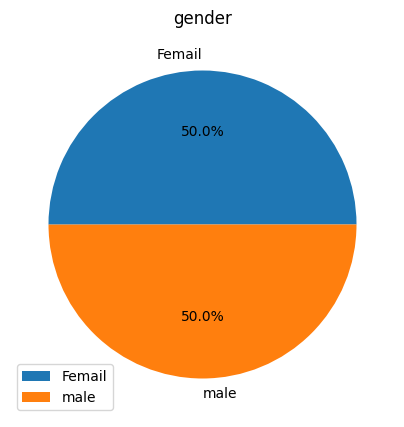

In [74]:
# Age distribution
y=df['gender'].value_counts()
plt.figure(figsize=(5,5))
labels=['Femail', 'male']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('gender')
plt.show()

<Axes: xlabel='long_hair', ylabel='count'>

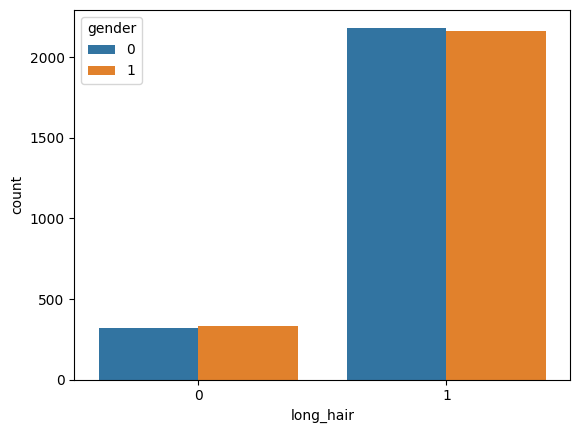

In [75]:
# plan
sns.countplot(x='long_hair',data=df,hue='gender')

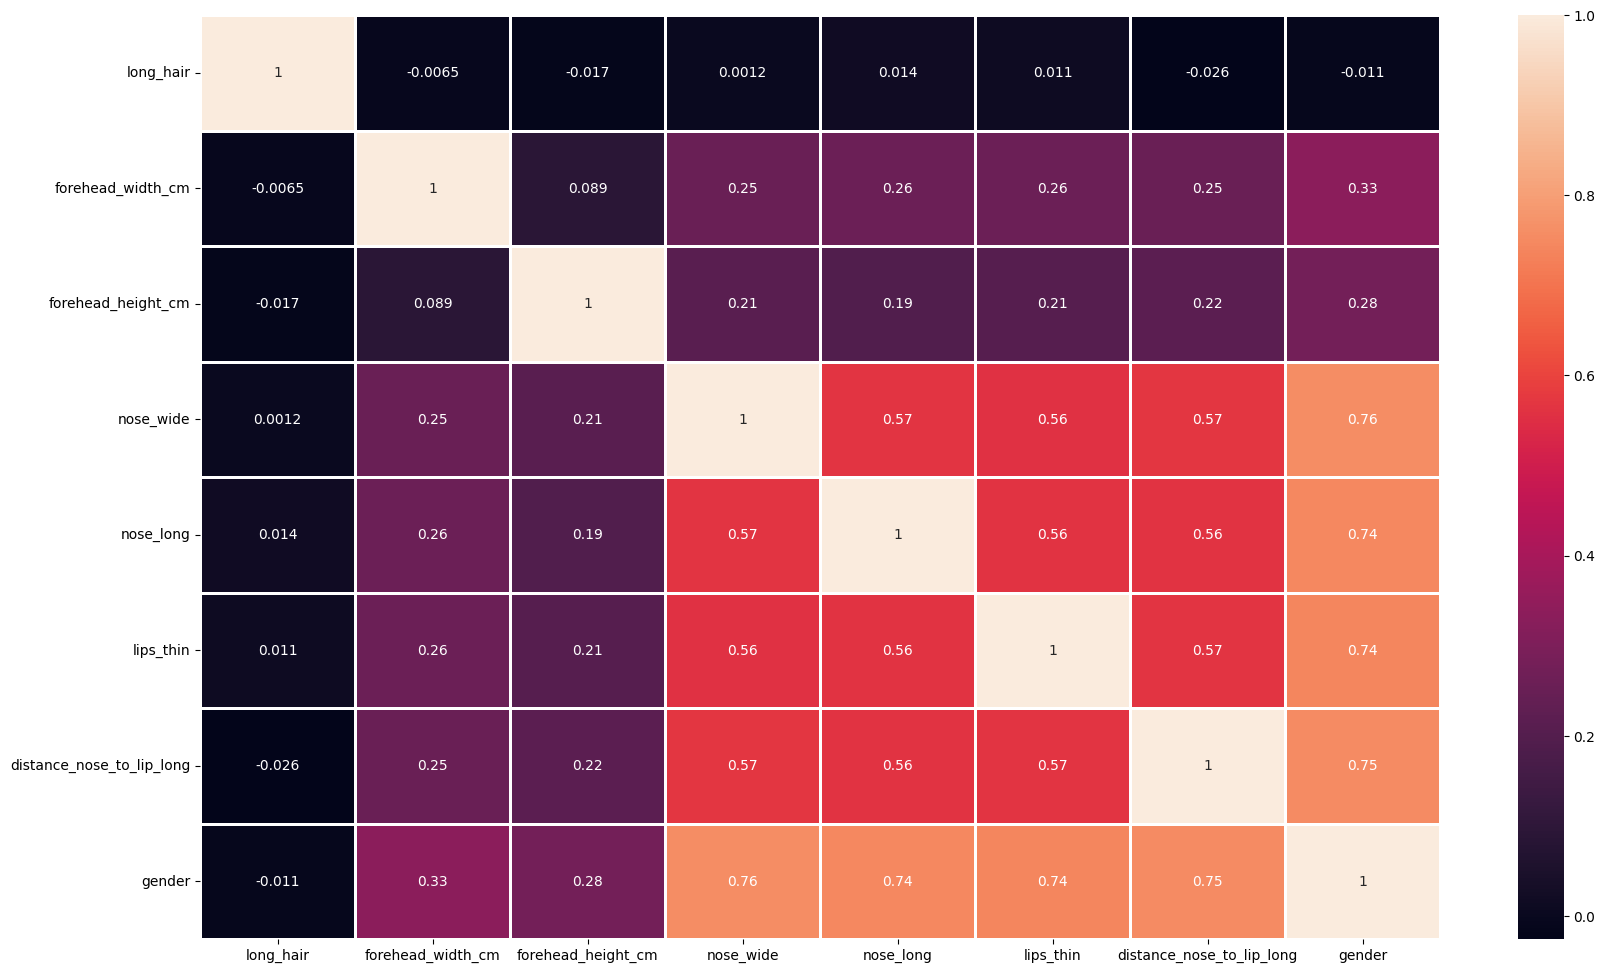

In [76]:
#correlation between variables
#heat map
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

In [42]:
#CHECKING FOR MISSING VALUES
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [43]:
#FINDING THE TYPES
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [44]:
#CONVERTING TO NUMERIC FORM
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["gender"]=le.fit_transform(df["gender"])

In [45]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [46]:
#SPLITING DATA
X=df.iloc[:,:-1]
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [47]:
y=df.iloc[:,-1]
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [48]:
#SCALING THE DATA SET UDING MIN MAX SCALER
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(X)
X_sc=mms.transform(X)
X_sc

array([[1.        , 0.09756098, 0.5       , ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.63414634, 0.15      , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.09756098, 0.6       , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 0.36585366, 0.3       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.43902439, 0.55      , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.97560976, 0.15      , ..., 1.        , 1.        ,
        1.        ]])

In [49]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
x,y=sm.fit_resample(X_sc,y)

In [50]:
#SPLITTING IN TO TEST DATA AND TRAIN DATA
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)


In [51]:
X_test.shape

(1501, 7)

In [52]:
X_train.shape

(3501, 7)

In [53]:
y_train.shape

(3501,)

In [54]:
y_test.shape

(1501,)

KNN

In [55]:
#hyper tuning for knn
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
clf=GridSearchCV(knn,params,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [56]:
print(clf.best_params_)

{'algorithm': 'brute', 'n_neighbors': 9, 'weights': 'distance'}


In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm='auto', n_neighbors= 5, weights= 'distance')
knn.fit(X_train,y_train)
#PREDICTING
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [58]:
y.value_counts()

1    2501
0    2501
Name: gender, dtype: int64

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       733
           1       0.97      0.96      0.97       768

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



SVC

In [60]:
#hyper tuning for svc:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}

# Create an SVC classifier
svc = SVC()

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a new SVC model with the best parameters
best_svc = SVC(**best_params)
best_svc.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = best_svc.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Test Accuracy:", accuracy)


Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Score: 0.969722844915427
Test Accuracy: 0.9733510992671552


In [61]:
sv=SVC(C=10, gamma =1, kernel= 'rbf')
sv.fit(X_train,y_train)
y_pred2=sv.predict(X_test)
y_pred2

array([0, 0, 0, ..., 1, 0, 1])

In [62]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       733
           1       0.98      0.97      0.97       768

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



Gaussian NB

In [63]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)
y_pred2

array([0, 0, 0, ..., 1, 0, 1])

In [64]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       733
           1       0.97      0.98      0.97       768

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



DecisionTreeClassifier

In [65]:
#hyper tuning
# Define the parameter grid for GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 15]}

# Create a DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a new DecisionTreeClassifier with the best parameters
best_dtc = DecisionTreeClassifier(**best_params)
best_dtc.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = best_dtc.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Test Accuracy:", accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5}
Best Score: 0.9682938659058488
Test Accuracy: 0.9653564290473018


<!--  -->

In [39]:
dt=DecisionTreeClassifier(criterion='gini',random_state=2,max_depth=5)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
y_pred3

array([0, 0, 0, ..., 1, 0, 1])

In [66]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       733
           1       0.99      0.95      0.97       768

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



RandomForest Classifier

In [38]:
# #hyper tuning
param_grid = {'n_estimators': [100, 200, 300], 'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10],'min_samples_split': [2, 4],'min_samples_leaf': [1, 2]}

# Create a RandomForestClassifier
rfc = RandomForestClassifier()

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a new RandomForestClassifier with the best parameters
best_rfc = RandomForestClassifier(**best_params)
best_rfc.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = best_rfc.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Test Accuracy:", accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
Best Score: 0.9762910128388018
Test Accuracy: 0.9766822118587608


In [68]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 4,n_estimators= 200)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
y_pred4

array([0, 0, 0, ..., 1, 0, 1])

In [69]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       733
           1       0.98      0.97      0.97       768

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



xgboost

In [70]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create an XGBClassifier
xgb = XGBClassifier()

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a new XGBClassifier with the best parameters
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = best_xgb.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Test Accuracy:", accuracy)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best Score: 0.9774326472386387
Test Accuracy: 0.9760159893404398


In [71]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred7=xgb.predict(X_test)
y_pred7

array([0, 0, 0, ..., 1, 0, 1])

In [72]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       733
           1       0.97      0.97      0.97       768

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [67]:
og=knn.predict(mms.transform([[1,12.3,6.0,1,0,0,1]]))
if og==1:
  print("male")
else:
  print("female")

male
